# REDES NEURAIS

In [62]:
# Importação das bibliotecas
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

In [63]:
base = pd.read_csv('data_balanceado.csv')
X = base.drop("Diabetes_012", axis=1)
y = base['Diabetes_012']
y

,Diabetes_012
0,2.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
9175,1.0
9176,1.0
9177,1.0
9178,0.0


In [64]:
# Transformação da classe para o formato "dummy", pois temos uma rede neural com 3 neurônios na camada de saída
y = to_categorical(y)
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [66]:
# Dividir os dados em treino e teste
#80% para treinar o modelo (X_train, y_train)
#20% para testar o modelo (X_test, y_test)
# A função train_test_split faz essa separação automaticamente.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de entrada
# StandardScaler para: calcular os valores médios e desvio padrão no X_train.
# Aplicar essa transformação no X_train e X_test.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Criar a rede neural com 3 saídas (multiclasse)
from tensorflow.keras import Input

modelo = Sequential()
modelo.add(Input(shape=(X.shape[1],)))  # define o formato da entrada
modelo.add(Dense(16, activation='relu')) ## primeira camada oculta
modelo.add(Dense(8, activation='relu')) ## segunda camada oculta
modelo.add(Dense(3, activation='softmax'))  # 3 saídas para as 3 classes

# Aqui construímos a rede:
# Input: diz que temos 10 variáveis de entrada.
# Dense(16, activation='relu'): primeira camada com 16 neurônios e ativação ReLU (função que "liga ou desliga" o neurônio).
# Dense(8, activation='relu'): segunda camada com 8 neurônios.
# Dense(3, activation='softmax'): camada final com 3 neurônios (uma saída para cada classe) e função, que transforma os valores em probabilidades.

In [72]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339 (1.32 KB)

 Trainable params: 339 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [81]:
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
# Treinar a rede neural
#Aqui a rede começa a "aprender", ou seja, ajustar seus neurônios para prever corretamente se um paciente tem ou não diabetes.
# epochs=100: número de vezes que a rede vê todo o conjunto de dados.
# batch_size=10: quantas amostras são passadas por vez.
# validation_split=0.2: separa 20% dos dados de treino para validação (ajuda a evitar overfitting).
# A saída dessa célula vai mostrar, a cada época:
# A acurácia no treino
# A acurácia na validação
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 1000,
           validation_data = (X_teste, y_teste))

Epoch 1/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5072 - loss: 0.9715 - val_accuracy: 0.5005 - val_loss: 1.0217
Epoch 2/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5066 - loss: 0.9621 - val_accuracy: 0.4940 - val_loss: 1.0109
Epoch 3/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5030 - loss: 0.9707 - val_accuracy: 0.4929 - val_loss: 1.0189
Epoch 4/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5059 - loss: 0.9730 - val_accuracy: 0.4973 - val_loss: 1.0079
Epoch 5/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5050 - loss: 0.9754 - val_accuracy: 0.4984 - val_loss: 1.0219
Epoch 6/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5046 - loss: 0.9668 - val_accuracy: 0.5027 - val_loss: 1.0253
Epoch 7/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5009 - loss: 0.9703 - val_accuracy: 0.5011 - val_loss: 1.0244
Epoch 8/1000
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5087 - loss: 0.9723 -

In [82]:
# Avaliar o desempenho no conjunto de teste
# Aqui testa o desempenho da rede com dados que ela nunca viu.
# O valor impresso é a acurácia final no conjunto de teste.

loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 27.1421
Acurácia no teste: 33.61%


In [83]:
# Previsões e mudar a variável para True ou False de acordo com o threshold 0.5
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False, False,  True],
       [False, False, False],
       [False, False,  True],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [84]:
# Como é um problema com três saídas, precisamos buscar a posição que possui o maior valor (são retornados 3 valores)
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

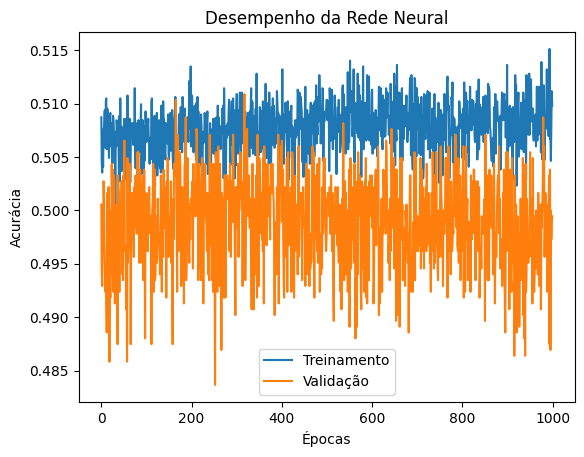

In [86]:
import matplotlib.pyplot as plt

# Visualizar o desempenho durante o treinamento
# O gráfico mostra como a acurácia da rede foi evoluindo ao longo do treinamento:
# Linha azul: acurácia durante o treino
# Linha laranja: acurácia durante a validação
# Se as duas linhas sobem e ficam estáveis, o modelo está aprendendo bem.


plt.plot(historico.history['accuracy'], label='Treinamento')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Desempenho da Rede Neural')
plt.show()


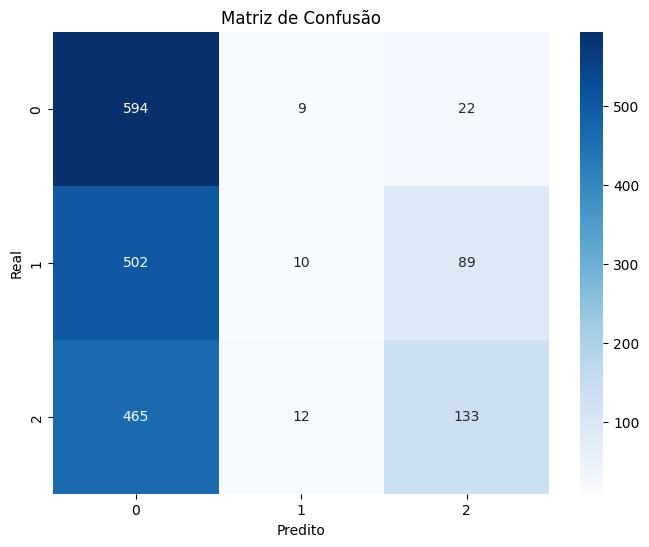

In [88]:
import seaborn as sns
# Geração da matriz de confusão
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### VALIDAÇÕES
    ° Hold - out
    ° Cross - validation
    ° Random subsampling

### MÉTRICAS

### CURVA ROC